# 1.1) Description and Source of Data

https://storage.googleapis.com/open-targets-data-releases/21.02/input/annotation-files/baseline_expression_counts-2020-05-07.tsv. 

This dataset contains RNA expression values for 110 different organs on which we attempt to determine tissue specificity scores from 0 to 1 - were 1 is defined as an  unspecific gene that is expressed everywhere in the body and therefore considered to be of high risk and 0 is a gene of high specificity (low risk). This dataset was downloaded using wget from the GNU project.


**Strategy**

In [ ]:
# mount google drive to colab
from google.colab import drive
import os
n = 140
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone1/

print("###\n### {}".format(os.getcwd()))
print("#" * n)



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiTnX6VjX6yW8P95Vl1utuJ7vXg5W9TmulBfPyjJS6YHU6HEsuLu00


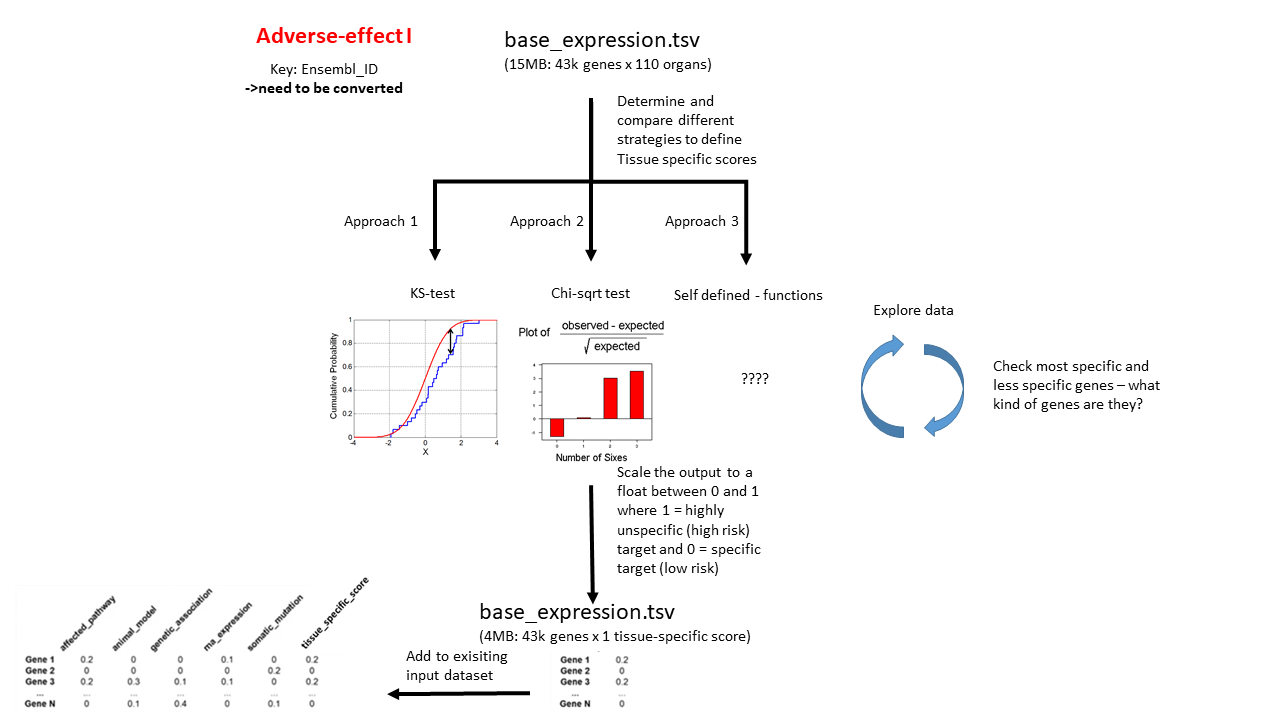

In [ ]:
from IPython.display import Image
Image('Visualizations/tissue_specificity.png', width=900, height=500)


**Catch all files in directory**

In [2]:
import subprocess
import re

# define the ls command to find all results
ls = subprocess.Popen(["ls", "-p", "./Raw_Assets"],
                      stdout=subprocess.PIPE,
                     )

# define the grep command to exclude all folders
grep = subprocess.Popen(["grep", "-v", "/$"],
                        stdin=ls.stdout,
                        stdout=subprocess.PIPE,
                        )

# read from the end of the pipe (stdout)
endOfPipe = grep.stdout

json = {}
txt = {}
csv = {}
gmt = {}
all = []
path = "Raw_Assets/"
# output the files line by line
for line in endOfPipe:  
    
    w = re.sub( "\\\\n'$", "", str(line))
    w = re.sub("^b'", "", w)
    front = re.sub("\d+.", "", w)
    name = re.sub("\..*", "", front)

    all.append(w)
    if ".json" in w:        
        json[name] = path + w
    elif ".txt" in w or ".tsv" in w:
        txt[name] = path + w
    elif ".csv" in w:
        csv[name] = path + w
    else:
        gmt[name] = path + w
    
    
    
#     if (w[0] == "C") | (w[0] == "D"):
#         colnames.append(w)

# 1.2) Downloading the data

To infer tissue specificity for each gene we are using the baseline dataset from Open Targets Platform which harmonized the RNA expression levels of three very big platforms [ExpressionAtlas](https://www.ebi.ac.uk/gxa/home), [HPA](https://www.proteinatlas.org/) and [GTEx](https://www.gtexportal.org/home/) 



the following code checks if the dataset is already in the working directory if not it will be downloaded using wget

In [ ]:
import os

n = 80
if "baseline_expression_counts-tsv" not in txt.keys():
  # download STRING interactome of human protein
  print("#"* n)
  print("### Download baseline file to working directory") 
  print("#"* n)
  print("### path: {}".format(os.getcwd()))
  print("#"* n)
  %cd Raw_Assets/
  
  !wget https://storage.googleapis.com/open-targets-data-releases/21.02/input/annotation-files/baseline_expression_counts-2020-05-07.tsv
  
  %cd ../
else: 
  print("#"* n)
  print("### file already exists in working directory")
  print("#"* n)
  print("### path: {}\n### sub-directory: {}".format(os.getcwd(), txt["baseline_expression_counts-tsv"]))
  
  print("###\n### --> no need to download it again!")
  print("#"* n)
  

################################################################################
### file already exists in working directory
################################################################################
### path: /content/drive/Shareddrives/MADS_Milestone1
### sub-directory: Raw_Assets/baseline_expression_counts-2020-05-07.tsv.1
###
### --> no need to download it again!
################################################################################


# 1.3) Importing Libraries 

In [3]:
# importing libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None) # Setting max number of dataframe rows to show
pd.set_option('display.max_columns', None) # Setting max number of dataframe cols to show
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import math
import sklearn
import scipy.stats as stats # To create the nomal distributions over the histogram plot
from scipy.stats import norm # To create the nomal distributions over the histogram plot
from scipy import stats
from scipy.stats import chisquare


# 2.1) Manipulation and Quantitative Exploration of 'baseline' data

In [4]:
# Loading the file
def load_baseline(path):
  """Description of the Function
  
  Returning a Dataframe from specified file path

  Input --> File Path for baseline data

  Output --> Dataframe
  """

  bsln = pd.read_csv(path, sep='\t')
  return bsln

df_bsln=load_baseline(txt["baseline_expression_counts-tsv"])

df_bsln.head()

,ID,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,caudate nucleus,"CD14-positive, CD16-negative classical monocyte","CD3-positive, CD4-positive, CD8-positive, double positive thymocyte","CD34-negative, CD41-positive, CD42-positive megakaryocyte cell",CD38-negative naive B cell,"CD4-positive, alpha-beta T cell","CD4-positive, alpha-beta thymocyte","CD8-positive, alpha-beta T cell","CD8-positive, alpha-beta thymocyte","central memory CD4-positive, alpha-beta T cell","central memory CD8-positive, alpha-beta T cell",cerebellar hemisphere,cerebellum,cerebral cortex,class switched memory B cell,colon,common lymphoid progenitor,common myeloid progenitor,conventional dendritic cell,coronary artery,cortex of kidney,cytotoxic CD56-dim natural killer cell,duodenum,EBV-transformed lymphocyte,ectocervix,"effector memory CD4-positive, alpha-beta T cell","effector memory CD8-positive, alpha-beta T cell",endocervix,endometrium,endothelial cell of umbilical vein (proliferating),endothelial cell of umbilical vein (resting),erythroblast,esophagogastric junction,esophagus,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,frontal lobe,gall bladder,granulocyte monocyte progenitor cell,greater omentum,heart,heart left ventricle,hematopoietic multipotent progenitor cell,hematopoietic stem cell,hippocampus proper,hypothalamus,inflammatory macrophage,kidney,leukocyte,liver,lower leg skin,lung,lymph node,macrophage,mature eosinophil,mature neutrophil,megakaryocyte-erythroid progenitor cell,memory B cell,minor salivary gland,neutrophilic metamyelocyte,nucleus accumbens,ovary,pancreas,pituitary gland,placenta,plasma cell,prefrontal cortex,prostate gland,putamen,rectum,regulatory T cell,saliva-secreting gland,segmented neutrophil of bone marrow,sigmoid colon,skeletal muscle tissue,small intestine,small intestine Peyer's patch,smooth muscle tissue,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,temporal lobe,testis,thyroid gland,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
0,ENSG00000000003,3650,1727,35.0,527,833.5,603.5,157.0,190.5,533.5,1771,389,293,429,433.0,40.0,87,607,42.5,135.0,107,102.0,155,67,39,125,146,269.0,37,3567,77.5,35,30,678,1056.0,21,1599.0,97,2327.0,54,43,1463,2114,1463.0,2022.5,824,699.5,2948.0,3045,629.5,2055,232.5,1296,9,1938.0,790,654.0,39,148.0,365,457,14,2492.5,189,4949.5,675,541.5,381.0,31.0,4,76.5,15.0,18,1623,53.0,406,5141.5,1309,1757,1653,13.5,269,867,350,3034.5,30,6506.0,74,859.0,1454.5,896,873,1468,476,998.0,2159.5,448.5,661.0,285,1231.0,862.0,994.0,1286,881,3160.5,2198,1525,1853.5,1340,397.5,639.0
1,ENSG00000000005,1062,1,0.0,5,4.0,7.0,1.0,0.0,3.0,360,7,7,2,1.5,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,6.0,0,37,0.0,0,0,13,9.0,0,15.0,0,5.0,0,0,1,13,0.0,0.0,0,7.0,14.0,2,7.0,11,8.0,15,0,382.0,35,9.0,0,0.0,7,4,0,19.5,1,0.0,93,1.0,0.0,0.0,0,0.0,0.0,0,11,0.0,2,47.5,2,1,93,0.0,13,6,1,27.5,0,23.0,0,9.0,40.0,0,10,31,4,4.0,753.0,8.0,52.0,0,3.0,5.0,24.0,73,9,1.0,22,4,7.0,4,24.0,13.5
2,ENSG00000000419,1681,1497,2667.5,898,1357.0,1464.0,671.0,1967.0,1501.0,1272,993,1092,939,967.5,2237.5,1425,2615,1421.0,2100.5,1221,1843.5,1364,1885,1736,922,815,982.5,1683,1983,1896.0,597,2101,1261,1085.0,1493,1621.0,1807,1212.0,1793,1757,1161,1806,1325.5,1169.5,4548,1179.0,2115.5,1402,1171.0,1258,389.0,1775,1720,1382.0,2223,1525.5,1580,2121.0,1021,1052,1836,1548.0,1617,1452.0,1098,1162.0,1871.5,1360.0,580,6557.5,1491.0,1482,1217,2134.0,971,1260.5,1566,1043,1915,2132.0,614,1153,920,1887.5,1775,1432.5,3765,1172.0,1333.5,1789,1161,1473,1238,1310.5,1233.0,940.5,1180.5,349,1677.0,1148.5,1273.5,1138,1990,1646.5,1179,1128,1205.0,1275,1720.0,1333.0
3,ENSG00000000457,808,746,653.5,452,594.5,511.5,792.5,363.5,684.5,951,463,463,492,459.0,309.0,1468,1312,967.5,1614.0,1519,818.5,14

This dataset contains for each potential gene/target the RNA expression levels of the different 110 organs. Thereby, the genes are encoded as ensemb:geneID which needs to be converted to a gene symbol for the data integration with the other data sources.

This dataset contains all the 43k ensembl:genes which are currently known. More than the half of these genes are not relevant for our task because they are not the classical genes which are transcribed and translated to a functional protein and therefore not common to be targeted (currently available protein coding genes [19'331](https://www.genenames.org/tools/search/#!/?query=&rows=20&start=0&filter=document_type:gene).

***Define a function that is converting any gene ID that is chosen to a gene symbol.***

In [5]:
# Converting gene key to gene symbols to allow efficient joining with other data files

# Setting up the function
def convert_any_to_Symbol(ensembl=  ['ENSP00000000233', 
                                              'ENSP00000272298', 
                                              'ENSP00000253401'],
                                   which_ensembl = ['ensembl.protein', 
                                                    'ensembl.gene', 
                                                    'ensembl.transcript',
                                                    'entrezgene'][0], 
                                   species="human"):
  """ Description of the Function
  
  Providing a list of gene symbols for the Gene names

  Input --> List of Gene Names and type

  Output --> gene symbols

  """


  # check if mygene module is already installed
  import importlib
  exist_mygene = importlib.util.find_spec("mygene")
  if exist_mygene is None:
      !pip install mygene
  # import mygene module
  import mygene
  # set the connection to the mygene API
  mg = mygene.MyGeneInfo()
  # create the query
  q = mg.querymany(ensembl, scopes=which_ensembl, fields="ensembl,symbol", 
                   species=species, returnall=True)
  print("#######################################################################################\nmissiging queries")
  print(q["missing"])
  print("#######################################################################################\nduplicated queries")
  print(q["dup"])
  conv = {}
  n= 0
  for v, i in zip(ensembl, q["out"]):
    #print(n, i)
    #n += 1
    if isinstance(i, list):
      if i != []:    
        if "symbol" in i[0].keys():
          conv[v] = i[0]["symbol"]
        else:
          conv[v] = "no-symbol"
      else:
        conv[v] = "not-found"
    else: 
      if "symbol" in i.keys():
        conv[v] = i["symbol"]
      else:
        conv[v] = "no-symbol"
  print("#######################################################################################\nconverted queries")
  print(conv)
  return conv



Apply the defined function and convert the endembl:geneIDs to gene symbols

In [6]:
# Executing the function
conv = convert_any_to_Symbol(df_bsln.ID.to_list(), which_ensembl = "ensembl.gene")
df_bsln["SYMBOL"] = df_bsln["ID"].replace(conv).to_list()
df_bsln = df_bsln.set_index("SYMBOL")



querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [7]:
# Returning rows with symbol ='no-symbol'
df_no_symbol=df_bsln[df_bsln.index=='no-symbol']
print('Count of rows which have no-symbol', len(df_no_symbol))

Count of rows which have no-symbol 12588


The baseline dataframe has 12,588 rows of gene symbols with 'no-symbol'. There are plenty reasons why there was no gene symbol found. The main reason is that there was no protein coding gene and therefore there is no gene symbol existing.

Another expected issue is that there are several ensembl:gene IDs that are pointing to the same gene symbol. This is because there might be several splicing variants of a certain gene, but they all express the same protein with some modifications on it.

We are going to average these duplicated gene symbols using the groupby() function


In [ ]:
# Dropping the redundant 'ID' column and also converting nan numeric values to NaN (as all columns are numeric 
# so non numeric data would represent missing data)

def frame_manipulation(frame):
  """ Description of the Function
  
  Converting a Data frame by removing'ID' column and also converting nan numeric values to NaN

  Input --> dataframe

  Output --> modified dataframe

  """
  df_bsln=frame

  if 'ID' in df_bsln.columns:
      
    # Dropping ID columns as it is now redundant 
    df_bsln.drop(['ID'], axis = 1,inplace=True)
  print(df_bsln.shape)
  # Convert any non numeric values in the col to NaN
  df_bsln = df_bsln.apply(pd.to_numeric, errors='coerce')
  print(df_bsln.shape)
  df_bsln = df_bsln.groupby("SYMBOL").mean()
  print(df_bsln.shape)
  return df_bsln


df_bsln=frame_manipulation(df_bsln)

# print('\n Count of nulls in dataframe -->')
# print(df_bsln.isnull().sum(axis=0))

df_bsln.head()

(43663, 110)
(43663, 110)
(30737, 110)


,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,caudate nucleus,"CD14-positive, CD16-negative classical monocyte","CD3-positive, CD4-positive, CD8-positive, double positive thymocyte","CD34-negative, CD41-positive, CD42-positive megakaryocyte cell",CD38-negative naive B cell,"CD4-positive, alpha-beta T cell","CD4-positive, alpha-beta thymocyte","CD8-positive, alpha-beta T cell","CD8-positive, alpha-beta thymocyte","central memory CD4-positive, alpha-beta T cell","central memory CD8-positive, alpha-beta T cell",cerebellar hemisphere,cerebellum,cerebral cortex,class switched memory B cell,colon,common lymphoid progenitor,common myeloid progenitor,conventional dendritic cell,coronary artery,cortex of kidney,cytotoxic CD56-dim natural killer cell,duodenum,EBV-transformed lymphocyte,ectocervix,"effector memory CD4-positive, alpha-beta T cell","effector memory CD8-positive, alpha-beta T cell",endocervix,endometrium,endothelial cell of umbilical vein (proliferating),endothelial cell of umbilical vein (resting),erythroblast,esophagogastric junction,esophagus,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,frontal lobe,gall bladder,granulocyte monocyte progenitor cell,greater omentum,heart,heart left ventricle,hematopoietic multipotent progenitor cell,hematopoietic stem cell,hippocampus proper,hypothalamus,inflammatory macrophage,kidney,leukocyte,liver,lower leg skin,lung,lymph node,macrophage,mature eosinophil,mature neutrophil,megakaryocyte-erythroid progenitor cell,memory B cell,minor salivary gland,neutrophilic metamyelocyte,nucleus accumbens,ovary,pancreas,pituitary gland,placenta,plasma cell,prefrontal cortex,prostate gland,putamen,rectum,regulatory T cell,saliva-secreting gland,segmented neutrophil of bone marrow,sigmoid colon,skeletal muscle tissue,small intestine,small intestine Peyer's patch,smooth muscle tissue,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,temporal lobe,testis,thyroid gland,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7SK,0.0,49.5,126149.5,228.5,93.75,71.25,476.25,3.75,336.5,34.0,212.0,147.5,159.5,231.0,39639.25,51758.0,38799.5,92843.25,35255.5,31307.0,142427.5,50360.5,59485.5,82645.5,240.5,157.5,106.25,259026.5,1.5,148740157.0,497.0,56576.0,59.5,88.25,63781.5,0.0,52.5,81.25,90449.5,39912.5,72.0,5.5,116191.0,132877.75,18502.0,37.0,0.0,33.5,48.75,53.0,80.5,0.0,122.0,35.75,5.5,48.5,2217.5,998.25,209.0,168.5,173291.5,23.5,19.5,78.25,36.5,38.75,0.0,147996.25,3155.5,4910.25,730.25,118532.5,27.0,43524.0,245.5,58.0,41.0,48.5,0.0,6.75,15.5,63.5,280.0,0.5,67737.5,0.0,6693.5,35.75,37.75,0.0,27.5,2.0,63.5,26.0,27.25,197.0,38.5,982.0,69.5,71.75,33.5,43.5,3.0,21.5,34.5,46.0,62.5,67.5,0.0,2.0
A1BG,0.0,14.0,17.5,34.0,19.00,47.00,38.00,0.00,38.0,24.0,42.0,43.0,62.0,45.5,23.00,67.0,47.0,37.50,24.0,46.0,61.0,75.0,29.0,55.0,111.0,118.0,53.00,51.0,5.0,13.5,78.0,39.0,43.0,17.00,11.0,0.0,69.0,40.00,35.0,39.0,52.0,19.0,14.0,14.50,18.0,20.0,10.5,17.0,16.00,26.0,60.0,0.0,10.0,22.00,18.0,17.0,32.0,137.00,39.0,46.0,27.0,1.0,67.0,2268.50,14.0,28.00,11.0,32.50,28.0,57.00,34.00,61.0,23.0,25.5,52.0,34.0,26.0,98.0,8.0,48.00,33.0,24.0,46.0,7.5,27.0,18.5,21.0,17.00,17.00,9.0,23.0,15.0,39.0,17.0,16.00,28.5,16.0,26.0,13.0,30.00,34.0,33.0,11.0,71.0,17.0,9.0,46.5,29.0,4.0,9.5
A1BG-AS1,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,6.0,0.0,0.0,0.0,1.0,1.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,0.0,0.0,

In [ ]:
# Quantitative exploration of the 'baseline expressions' file

def quant_explore(frame):
  """ Description of the Function
  
  Returning key quantitatve description of input dataframe

  Input --> dataframe

  Output --> shape, content of 1st 5 rows, description, skew, kurtosis, null count of dataframe

  """
  df_bsln=frame
  
  print('Shape of dataframe -->')
  print(df_bsln.shape)

  print('\n Contents of dataframe -->')
  print(df_bsln.head())
  
  print('\n Description of dataframe -->')
  print(df_bsln.describe())

  print('\n Skew of dataframe') # Skew <1 or <-1 means highly skewed
  print(df_bsln.skew(axis = 0))

  print('\n Kurtosis of dataframe') # Kurtosis 
  print(df_bsln.kurt(axis = 0))

  print ('\n Datatypes in dataframe -->')
  print(df_bsln.dtypes)

  print('\n Count of nulls in dataframe -->')
  print(df_bsln.isnull().sum(axis=0))


# Executing the function
quant_explore(df_bsln)

Shape of dataframe -->
(30737, 110)

 Contents of dataframe -->
          adipose tissue  adrenal gland  alternatively activated macrophage  \
SYMBOL                                                                        
7SK                  0.0           49.5                            126149.5   
A1BG                 0.0           14.0                                17.5   
A1BG-AS1             0.0            0.0                                 0.0   
A1CF                 4.0            7.0                                 0.0   
A2M              80717.0        20984.0                            139863.5   

          amygdala      aorta  atrium auricular region    blood  bone marrow  \
SYMBOL                                                                         
7SK          228.5      93.75                    71.25   476.25         3.75   
A1BG          34.0      19.00                    47.00    38.00         0.00   
A1BG-AS1       1.0       0.00                     0.00     0.0

Output from quantitative exploration -->

1. Shape: (30'737 rows * 110 cols.
2. There are no 'nulls' or missing data as such.
3. Datatypes is either float64 or int64 -i.e. quantitative.
4. Data is heavily right/ positively skewed.
5. Data has high Kurtosis indicates that there are plenty extreme values assuming a normal distribution.


As there is definitely a high dynamic range within each organ we are going to log2 transform the data so that we have a distribution of the data which is more normal distributed

# 2.2) Visual exploration of 'baseline' data

The data is log transformed to reduce skew.


In [ ]:
# Taking base 2 log on the dataframe

def df_log_transform(frame):
  """ Description of the Function
  
  Returning log transformed dataframe 

  Input --> dataframe

  Output --> log transformed dataframe

  """
  df_bsln=frame

  df_bsln=df_bsln.apply(np.log2)
  df_bsln.replace(-np.inf, 0, inplace=True) # replacing -inf with zero

  return df_bsln


# Executing the function
df_bsln=df_log_transform(df_bsln)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:215: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


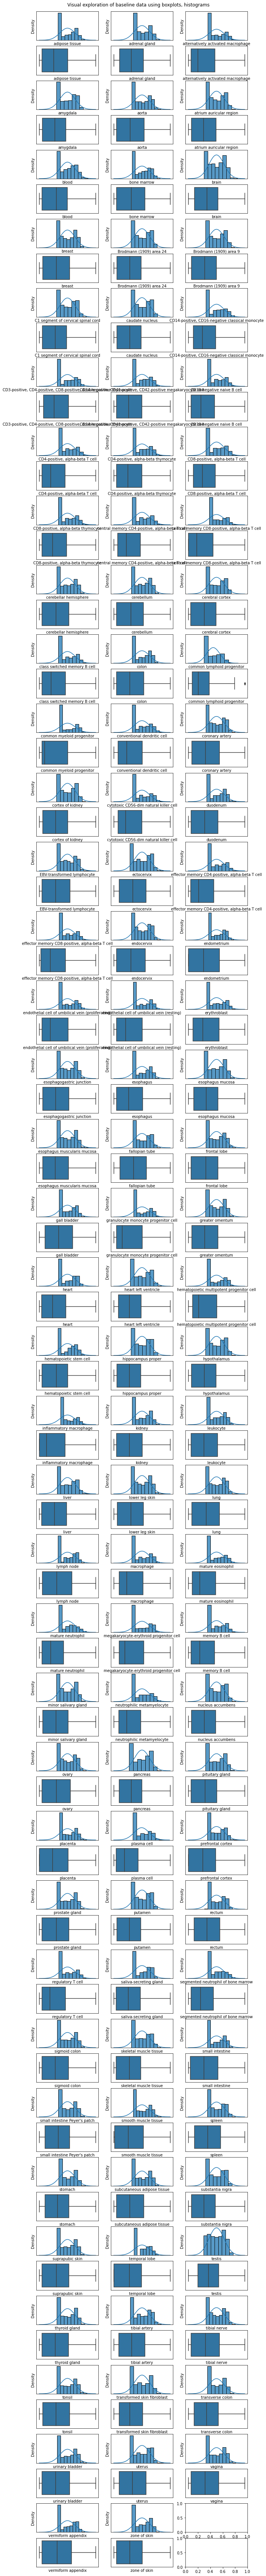

In [ ]:
# Initial Visual exploration of the data

def initial_viz_explor(frame):
  """ Description of the Function
  
  Initial Visual exploration using Box Plots, Histograms and normal PDFs

  Input --> dataframe

  Output --> Subplots containing boxplots, histograms and normal PDFs

  """


  df_bsln=frame

  col_lst=df_bsln.columns
  col_len=len(col_lst)
  # print(col_len)



  # Setting up the axes list
  bxplt_axs=[]
  hist_axs=[]
  all_figs_axs=[]

  # rws=math.ceil(col_len/3)

  fig,((ax1,ax2,ax3),
      (ax4,ax5,ax6),
      (ax7,ax8,ax9),
      (ax10,ax11,ax12),
      (ax13,ax14,ax15),
      (ax16,ax17,ax18),
      (ax19,ax20,ax21),
      (ax22,ax23,ax24),
      (ax25,ax26,ax27),
      (ax28,ax29,ax30),
      (ax31,ax32,ax33),
      (ax34,ax35,ax36),
      (ax37,ax38,ax39),
      (ax40,ax41,ax42),
      (ax43,ax44,ax45),
      (ax46,ax47,ax48),
      (ax49,ax50,ax51),
      (ax52,ax53,ax54),
      (ax55,ax56,ax57),
      (ax58,ax59,ax60),
      (ax61,ax62,ax63),
      (ax64,ax65,ax66),
      (ax67,ax68,ax69),
      (ax70,ax71,ax72),
      (ax73,ax74,ax75),
      (ax76,ax77,ax78),
      (ax79,ax80,ax81),
      (ax82,ax83,ax84),
      (ax85,ax86,ax87),
      (ax88,ax89,ax90),
      (ax91,ax92,ax93),
      (ax94,ax95,ax96),
      (ax97,ax98,ax99),
      (ax100,ax101,ax102),
      (ax103,ax104,ax105),
      (ax106,ax107,ax108),
      (ax109,ax110,ax111),
      (ax112,ax113,ax114),
      (ax115,ax116,ax117),
      (ax118,ax119,ax120),
      (ax121,ax122,ax123),
      (ax124,ax125,ax126),
      (ax127,ax128,ax129),
      (ax130,ax131,ax132),
      (ax133,ax134,ax135),
      (ax136,ax137,ax138),
      (ax139,ax140,ax141),
      (ax142,ax143,ax144),
      (ax145,ax146,ax147),
      (ax148,ax149,ax150),
      (ax151,ax152,ax153),
      (ax154,ax155,ax156),
      (ax157,ax158,ax159),
      (ax160,ax161,ax162),
      (ax163,ax164,ax165),
      (ax166,ax167,ax168),
      (ax169,ax170,ax171),
      (ax172,ax173,ax174),
      (ax175,ax176,ax177),
      (ax178,ax179,ax180),
      (ax181,ax182,ax183),
      (ax184,ax185,ax186),
      (ax187,ax188,ax189),
      (ax190,ax191,ax192),
      (ax193,ax194,ax195),
      (ax196,ax197,ax198),
      (ax199,ax200,ax201),
      (ax202,ax203,ax204),
      (ax205,ax206,ax207),
      (ax208,ax209,ax210),
      (ax211,ax212,ax213),
      (ax214,ax215,ax216),
      (ax217,ax218,ax219),
      (ax220,ax221,ax222),
      )=plt.subplots(74,3,figsize=(10,110))


  # List of axis items
  axis_hist=[ax1,ax2,ax3,
          ax7,ax8,ax9,
          ax13,ax14,ax15,
          ax19,ax20,ax21,
          ax25,ax26,ax27,
          ax31,ax32,ax33,
          ax37,ax38,ax39,
          ax43,ax44,ax45,
          ax49,ax50,ax51,
          ax55,ax56,ax57,
          ax61,ax62,ax63,
          ax67,ax68,ax69,
          ax73,ax74,ax75,
          ax79,ax80,ax81,
          ax85,ax86,ax87,
          ax91,ax92,ax93,
          ax97,ax98,ax99,
          ax103,ax104,ax105,
          ax109,ax110,ax111,
          ax115,ax116,ax117,
          ax121,ax122,ax123,
          ax127,ax128,ax129,
          ax133,ax134,ax135,
          ax139,ax140,ax141,
          ax145,ax146,ax147,
          ax151,ax152,ax153,
          ax157,ax158,ax159,
          ax163,ax164,ax165,
          ax169,ax170,ax171,
          ax175,ax176,ax177,
          ax181,ax182,ax183,
          ax187,ax188,ax189,
          ax193,ax194,ax195,
          ax199,ax200,ax201,
          ax205,ax206,ax207,
          ax211,ax212,ax213,
          ax217,ax218,ax219,
            ]

  axis_box=[ax4,ax5,ax6,
          ax10,ax11,ax12,
          ax16,ax17,ax18,
          ax22,ax23,ax24,
          ax28,ax29,ax30,
          ax34,ax35,ax36,
          ax40,ax41,ax42,
          ax46,ax47,ax48,
          ax52,ax53,ax54,
          ax58,ax59,ax60,
          ax64,ax65,ax66,
          ax70,ax71,ax72,
          ax76,ax77,ax78,
          ax82,ax83,ax84,
          ax88,ax89,ax90,
          ax94,ax95,ax96,
          ax100,ax101,ax102,
          ax106,ax107,ax108,
          ax112,ax113,ax114,
          ax118,ax119,ax120,
          ax124,ax125,ax126,
          ax130,ax131,ax132,
          ax136,ax137,ax138,
          ax142,ax143,ax144,
          ax148,ax149,ax150,
          ax154,ax155,ax156,
          ax160,ax161,ax162,
          ax166,ax167,ax168,
          ax172,ax173,ax174,
          ax178,ax179,ax180,
          ax184,ax185,ax186,
          ax190,ax191,ax192,
          ax196,ax197,ax198,
          ax202,ax203,ax204,
          ax208,ax209,ax210,
          ax214,ax215,ax216,
          ax220,ax221,ax222,
          ]

  fig.suptitle('Visual exploration of baseline data using boxplots, histograms')
  frame=df_bsln
  for idx,val in enumerate(col_lst):
    
      name=str(val)
      
      sns.histplot(frame[name],kde=False,bins=10,
                  label='',
                  stat='density',
                  ax=axis_hist[idx])
      
      mu=frame[name].mean() 
      sd=frame[name].std() 
      rv1 = norm(loc=mu,scale=sd)
      x1 = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 100)
      sns.lineplot(x=x1,y=stats.norm.pdf(x1, mu, sd),label='',ax=axis_hist[idx])

      sns.boxplot(x=frame[name],ax=axis_box[idx],)
      
      # Switching off ticks labels
      axis_hist[idx].set_xticks([])
      axis_hist[idx].set_yticks([])
      axis_hist[idx].grid('off')
      axis_box[idx].set_xticks([])
      axis_box[idx].set_yticks([])
      axis_box[idx].grid('off')


  #Show Plot
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)
  fig.subplots_adjust(top=0.977)
  plt.show()

# Executing the function
initial_viz_explor(df_bsln)


Output from the Visual Exploration -->


1.  The large right skew and positive kurtosis are kind of expected as not every gene is expressed at all in a certain organ - that is actually what is making a human or an animal special - each cell contains the same genome, but the underlying cells express only a small subset of genes in a certain environment. That is also what we can see on these plots. most genes do not show expression in one tissue but maybe in another.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


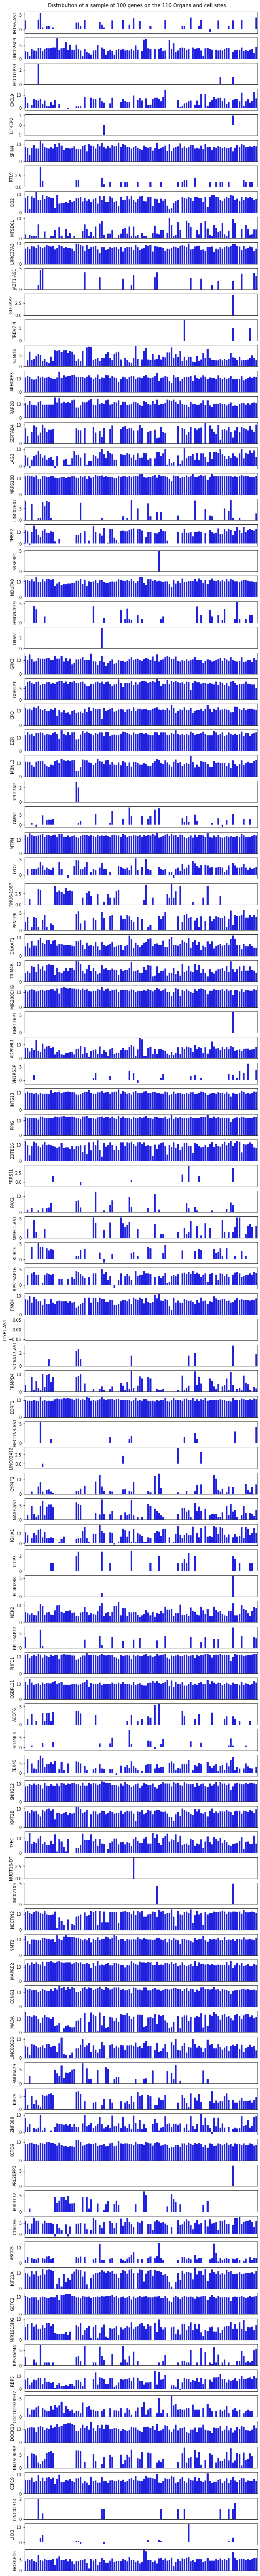

In [ ]:
# Plotting the distribution among organs for a sample of the +30k genes in the data across the 110 organs

def gene_exprsn_dist(frame):

  """ Description of the Function
    
    Gene Expression distribution for a sample of genes

    Input --> dataframe

    Output --> Subplots containing Gene Expression distribution

    """
  df_bsln=frame


  # Plotting for all +30k genes would exhaust memory -hence only sampling 100 genes
  df_bsln_smpl=df_bsln.sample(100,random_state=1)

  # df_bsln_smpl=df_bsln.head(2)

  fig,(ax1,ax2,ax3,
      ax4,ax5,ax6,
      ax7,ax8,ax9,
      ax10,ax11,ax12,
      ax13,ax14,ax15,
      ax16,ax17,ax18,
      ax19,ax20,ax21,
      ax22,ax23,ax24,
      ax25,ax26,ax27,
      ax28,ax29,ax30,
      ax31,ax32,ax33,
      ax34,ax35,ax36,
      ax37,ax38,ax39,
      ax40,ax41,ax42,
      ax43,ax44,ax45,
      ax46,ax47,ax48,
      ax49,ax50,ax51,
      ax52,ax53,ax54,
      ax55,ax56,ax57,
      ax58,ax59,ax60,
      ax61,ax62,ax63,
      ax64,ax65,ax66,
      ax67,ax68,ax69,
      ax70,ax71,ax72,
      ax73,ax74,ax75,
      ax76,ax77,ax78,
      ax79,ax80,ax81,
      ax82,ax83,ax84,
      ax85,ax86,ax87,
      ax88,ax89,ax90,
      ax91,ax92,ax93,
      ax94,ax95,ax96,
      ax97,ax98,ax99,
      ax100,
      )=plt.subplots(100,1,figsize=(10,100))


  axs_count=[ax1,ax2,ax3,
    ax4,ax5,ax6,
    ax7,ax8,ax9,
    ax10,ax11,ax12,
    ax13,ax14,ax15,
    ax16,ax17,ax18,
    ax19,ax20,ax21,
    ax22,ax23,ax24,
    ax25,ax26,ax27,
    ax28,ax29,ax30,
    ax31,ax32,ax33,
    ax34,ax35,ax36,
    ax37,ax38,ax39,
    ax40,ax41,ax42,
    ax43,ax44,ax45,
    ax46,ax47,ax48,
    ax49,ax50,ax51,
    ax52,ax53,ax54,
    ax55,ax56,ax57,
    ax58,ax59,ax60,
    ax61,ax62,ax63,
    ax64,ax65,ax66,
    ax67,ax68,ax69,
    ax70,ax71,ax72,
    ax73,ax74,ax75,
    ax76,ax77,ax78,
    ax79,ax80,ax81,
    ax82,ax83,ax84,
    ax85,ax86,ax87,
    ax88,ax89,ax90,
    ax91,ax92,ax93,
    ax94,ax95,ax96,
    ax97,ax98,ax99,
    ax100,
    ]


  # print(df_bsln_smpl)

  col_lst=list(df_bsln_smpl.columns)
  # print(col_lst)

  fig.suptitle('Distribution of a sample of 100 genes on the 110 Organs and cell sites')

  for i in range(df_bsln_smpl.shape[0]):
    data=df_bsln_smpl.iloc[i]
    df=pd.DataFrame(data)
    # print(df)


    
    # g=sns.countplot(x=data,label=data.name,ax=axs_count[i])
    # g=sns.barplot(x=data,label=data.name,ax=axs_count[i])
    g=sns.barplot(data = df
              ,x = df.index
              ,y = df.iloc[:, 0]
              ,color = 'blue' 
              ,ci = None
              # ,order=col_lst
              ,ax=axs_count[i])


    axs_count[i].set_xticks([]) # removing axis ticks
    # g.set_xticklabels(g.get_xticklabels(),rotation=90)
    
  #Show Plot
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=50.0)
  fig.subplots_adjust(top=0.977)
  plt.show()

# Executing the function
gene_exprsn_dist(df_bsln)

Output from bar chart of Genes across organs:

This serves as a first glance to revisit the distribution behaviour of some random selected gene targets. This was done because our main task in this notebook is to determine if a gene target shows tissue-specific or ubiquitous expression. So, in the next sections we decided to compare 5 different methods to score these different behaviours and check how well these represent the different distributions.


# 3.1) Tissue specificity score using UDF1 (user defined function 1)

A very basic self-defined calculation which counts the number of organs which do not express the certain gene at all and normalize it by the total number of organs (110)

In [ ]:
# Setting up the user specific function


def UDF1(dataframe):
  """ Description of the Function
    
    User defined Tissue Specificity Score, calculated by counting the number of non zero Expressions 
    per gene and then normalizing it by dividing this count by total number of relevant columns (110)

    Input --> dataframe

    Output --> dataframe with user defined Tissue Specificty Score

    """

 
  col_lst=dataframe.columns[:110]
 
  frame1=dataframe[col_lst].copy()
  
  frame1['count']=frame1.astype(bool).sum(axis=1)
  col_count=len(col_lst)
  # print(col_count)

  frame1['normalized_count']=frame1['count']/col_count

  dataframe['count']=frame1['count']
  dataframe['normalized_count']=frame1['normalized_count']

  return dataframe

  
# Executing the function
df_bsln=UDF1(df_bsln)
print(df_bsln.head())

# Filtering by count >0
df_bsln=df_bsln[df_bsln['count']>0]


          adipose tissue  adrenal gland  alternatively activated macrophage  \
SYMBOL                                                                        
7SK             0.000000       5.629357                           16.944775   
A1BG            0.000000       3.807355                            4.129283   
A1BG-AS1        0.000000       0.000000                            0.000000   
A1CF            2.000000       2.807355                            0.000000   
A2M            16.300585      14.357002                           17.093660   

           amygdala      aorta  atrium auricular region      blood  \
SYMBOL                                                               
7SK        7.836050   6.550747                 6.154818   8.895575   
A1BG       5.087463   4.247928                 5.554589   5.247928   
A1BG-AS1   0.000000   0.000000                 0.000000   0.000000   
A1CF       0.000000   2.000000                 2.000000   2.000000   
A2M       12.372049  17.29

Output --> We get a basic count and a normalized count. A normalized count of 1 means that the gene is showing some expression in all the different organs therefore non-specific and a lower than 1 normalized count indicates that the gene is more specific to only a few organs/cells.


This is by far the simplest expression one could think of and will perform well for the black and withe scenarios. However, this method will very likely perform very bad in the grey zone were genes start to express only a little in some organs and incredibly higher expressions in only a few tissues.

Therefore, we have thought about other methods that we bring into the comparison.

# 3.2) Tissue specificity score using UDF2 (User defined function 2)



This method is an extension of the first one, where we are going to center the normalized scores and scale it using the maximal expression. Using this formular we could better judge if these normalized scores (first formular) are rather uniformly distributed or dominated by a few extreme expressions.

In [ ]:
# Function for UDF2

def UDF2(frame):
  """ Description of the Function
    
    User defined Tissue Specificity Score, calculated by counting the number of non zero Expressions 
    per gene and then normalizing it by dividing this count by total number of relevant columns (110).
    Then Max of the dataframe row-Min of the dataframe row divided by Max of dataframe row is subtracted from
     the normalized score
    Finally the absolute value of this score is take

    Input --> dataframe

    Output --> dataframe with user defined Tissue Specificty Score

    """

  df_bsln=frame
  # print(df_bsln.head())
  col_lst=df_bsln.columns[:110]
  print(col_lst)

  df=df_bsln[col_lst]

  print(df.head())

  # Maxiumum of a set of rows
  maxValues = df.max(axis = 1)
  # print(maxValues)

  # Minimum of a Set of rows
  minValues = df.min(axis = 1)
  print(minValues)

  # AVerage of a Set of rows
  avgValues=df.mean(axis=1)
  # print(avgValues)

  df_bsln['max_val']=maxValues
  df_bsln['min_val']=minValues
  df_bsln['avg_val']=avgValues

  # df_bsln['UDF_Score']=abs(df_bsln['normalized_count']-(df_bsln['max_val']-df_bsln['min_val'])/df_bsln['max_val'])
  df_bsln['UDF_Score']=abs(df_bsln['normalized_count']-(df_bsln['avg_val'])/df_bsln['max_val'])




  return df_bsln

# Executing the function
df_bsln=UDF2(df_bsln)
print(df_bsln.head())


Streaming output truncated to the last 5000 lines.
SPTLC1P4                      0.000000
SPTLC1P5                      0.000000
SPTLC2                        9.722808
SPTLC3                        1.000000
SPTSSA                        7.845490
SPTSSB                       -1.000000
SPTY2D1                       8.603626
SPTY2D1OS                     8.836050
SPX                          -1.000000
SPZ1                          0.000000
SQLE                          5.339850
SQLE-DT                      -1.000000
SQOR                          5.781360
SQSTM1                       10.026523
SRA1                          9.120238
SRARP                         0.000000
SRBD1                         5.882643
SRC                           1.000000
SRCAP                         7.754888
SRCIN1                        0.000000
SRD5A1                        5.754888
SRD5A2                        0.000000
SRD5A2P1                      0.000000
SRD5A3                        6.159871
SRD5A3-AS1   

# 3.3) Tissue specificity score using the Gini coefficient

in this publication [Kryuchkova-Mostacci and Robinson-Rechavi](https://academic.oup.com/bib/article/18/2/205/2562739) observed that the Tau as well as the Gini coefficient performed the best to identify Tissue specificity. It is a measure of statistical dispersion intended to represent the income inequality or wealth inequality within a nation or any other group of people.

A value close to 0 = unspecific; n/(n-1) = specific = 0.99

We have taken the mathematical formulas from this publication and implemented them in three different ways and applied the fastest implementation on the dataset.

In [ ]:
x = np.array([0, 8, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0])
X = [x[i]/np.max(x) for i in range(len(x))]
round(sum([1-X[i] for i in range(len(X))])/(len(X)-1), 2)

0.95

In [ ]:
def gini1(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [ ]:
def gini2(x, w=None):
    # Array indexing requires reset indexes.
    x = pd.Series(x).reset_index(drop=True)
    if w is None:
        w = np.ones_like(x)
    w = pd.Series(w).reset_index(drop=True)
    n = x.size
    wxsum = sum(w * x)
    wsum = sum(w)
    sxw = np.argsort(x)
    sx = x[sxw] * w[sxw]
    sw = w[sxw]
    pxi = np.cumsum(sx) / wxsum
    pci = np.cumsum(sw) / wsum
    g = 0.0
    for i in np.arange(1, n):
        g = g + pxi.iloc[i] * pci.iloc[i - 1] - pci.iloc[i] * pxi.iloc[i - 1]
    return g

In [ ]:
def gini3(x):
    n = x.size
    w = pd.Series(np.ones_like(x)).reset_index(drop=True)
    wxsum = sum(x)
    sxw = np.argsort(x)
    sx = x[sxw] 
   
    pxi = np.cumsum(sx) / wxsum
    pci = pd.Series(np.arange(n) / n).reset_index(drop=True) #wsum
    
    return sum([pxi.iloc[i] * pci.iloc[i - 1] - pci.iloc[i] * pxi.iloc[i - 1] for i in range(1,n)])

In [ ]:
%timeit [gini1(df_bsln.iloc[i]) for i in range(100)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


1 loop, best of 5: 6.7 s per loop


In [ ]:
%timeit [gini2(df_bsln.iloc[i]) for i in range(100)] 


1 loop, best of 5: 803 ms per loop


In [ ]:
%timeit [gini3(df_bsln.iloc[i]) for i in range(100)]


1 loop, best of 5: 507 ms per loop


the best performing gini implementation is gini3()

We are going to apply the gini coefficient implemented gini3 on the dataset.

---



In [ ]:
gini_score = [gini2(df_bsln.iloc[i]) for i in range(len(df_bsln))]

In [ ]:
df_bsln["gini_score"] = gini_score

print('Statistical Description of Gini Score')
print(df_bsln.describe())

print('Count of missing values of Gini Score')
print(df_bsln.isnull().sum(axis=0))

Statistical Description of Gini Score
       adipose tissue  adrenal gland  alternatively activated macrophage  \
count    30537.000000   30537.000000                        30537.000000   
mean         5.197743       5.359552                            4.327439   
std          4.931402       4.647890                            4.689466   
min         -1.000000      -2.321928                           -1.000000   
25%          0.000000       0.000000                            0.000000   
50%          4.700440       4.954196                            2.584963   
75%         10.000000       9.876517                            8.962896   
max         20.698245      20.758556                           20.006812   

           amygdala         aorta  atrium auricular region         blood  \
count  30537.000000  30537.000000             30537.000000  30537.000000   
mean       5.430411      5.412860                 5.403496      5.535781   
std        4.608577      4.699374                

# 3.4) Tissue specificity score using the Tau

as described before in the same publication [Kryuchkova-Mostacci and Robinson-Rechavi 2016](https://academic.oup.com/bib/article/18/2/205/2562739) we have fetched the mathematical formula that best performed here it was tau and implemented it in python code.

A value close to 0 = unspecific; 1 = specific

The original paper from which the first paper has used the tau formula [Yanai et al 2004](https://academic.oup.com/bioinformatics/article/21/5/650/220059?login=true) 

In [ ]:
# tau implementation
def tau(x):
  m = np.max(x)
  n = len(x)
  norm = [x[i]/m for i in range(n)]
  return sum([1-norm[i] for i in range(n)])/(n-1)

In [ ]:
# perferomance 
x = np.array([0, 8, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0])
%timeit tau(x)

The slowest run took 11.21 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 17.7 µs per loop


The tau implementation is much faster than the gini score - so no need to further tweak it. We are going to work with this implementation.

In [ ]:
tau_score = [tau(df_bsln.iloc[i]) for i in range(len(df_bsln))]
df_bsln["tau_score"] = tau_score


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Text(0, 0.5, 'Gini-score')

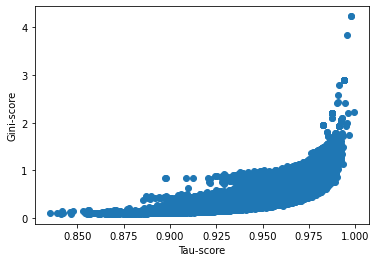

In [ ]:
plt.plot(tau_score, gini_score, "o")
plt.xlabel("Tau-score")
plt.ylabel("Gini-score")


There is an obvious relation between gini and tau coefficients. 

Let's test another two methods that may have the potential to infer specificity.

# 3.5) Tissue specificity score using kolmogorov smirnov (KS) Test

We will use KS test to identify if the distribution of each gene is uniform or has individual peaks.

In [ ]:
# Tissue specificity score using KS Test

# Use KS Test to identify if the distribution at each row is uniform or it has peaks
col_lst=df_bsln.columns[:110]
# print(col_lst)

df=df_bsln[col_lst].copy()

def ks_tst(row):
  """ Description of the Function
    
    Calculating KS Test on dataframe row vs Universal distribution

    Input --> dataframe row

    Output --> KS Test score

    """
  d,p=stats.kstest(row, 'uniform',)
  return d

ks_tst_pval=df.apply(ks_tst, axis=1)  

df_bsln['ks_tst_score']=ks_tst_pval

# Min Max normalization of KS Test p val
df_bsln['ks_tst_score']=(df_bsln['ks_tst_score']-df_bsln['ks_tst_score'].min())/(df_bsln['ks_tst_score'].max()-df_bsln['ks_tst_score'].min())


# Replacing NaN with 0
df_bsln['ks_tst_score']=df_bsln['ks_tst_score'].fillna(0)

# Z score normalization
# df_bsln['ks_tst_unifrom_pval']=(df_bsln['ks_tst_unifrom_pval']-df_bsln['ks_tst_unifrom_pval'].mean())/df_bsln['ks_tst_unifrom_pval'].std()

df_bsln.head(5)

,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,caudate nucleus,"CD14-positive, CD16-negative classical monocyte","CD3-positive, CD4-positive, CD8-positive, double positive thymocyte","CD34-negative, CD41-positive, CD42-positive megakaryocyte cell",CD38-negative naive B cell,"CD4-positive, alpha-beta T cell","CD4-positive, alpha-beta thymocyte","CD8-positive, alpha-beta T cell","CD8-positive, alpha-beta thymocyte","central memory CD4-positive, alpha-beta T cell","central memory CD8-positive, alpha-beta T cell",cerebellar hemisphere,cerebellum,cerebral cortex,class switched memory B cell,colon,common lymphoid progenitor,common myeloid progenitor,conventional dendritic cell,coronary artery,cortex of kidney,cytotoxic CD56-dim natural killer cell,duodenum,EBV-transformed lymphocyte,ectocervix,"effector memory CD4-positive, alpha-beta T cell","effector memory CD8-positive, alpha-beta T cell",endocervix,endometrium,endothelial cell of umbilical vein (proliferating),endothelial cell of umbilical vein (resting),erythroblast,esophagogastric junction,esophagus,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,frontal lobe,gall bladder,granulocyte monocyte progenitor cell,greater omentum,heart,heart left ventricle,hematopoietic multipotent progenitor cell,hematopoietic stem cell,hippocampus proper,hypothalamus,inflammatory macrophage,kidney,leukocyte,liver,lower leg skin,lung,lymph node,macrophage,mature eosinophil,mature neutrophil,megakaryocyte-erythroid progenitor cell,memory B cell,minor salivary gland,neutrophilic metamyelocyte,nucleus accumbens,ovary,pancreas,pituitary gland,placenta,plasma cell,prefrontal cortex,prostate gland,putamen,rectum,regulatory T cell,saliva-secreting gland,segmented neutrophil of bone marrow,sigmoid colon,skeletal muscle tissue,small intestine,small intestine Peyer's patch,smooth muscle tissue,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,temporal lobe,testis,thyroid gland,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin,count,normalized_count,max_val,min_val,avg_val,UDF_Score,gini_score,tau_score,ks_tst_score
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7SK,0.000000,5.629357,16.944775,7.836050,6.550747,6.154818,8.895575,1.906891,8.394463,5.087463,7.727920,7.204571,7.317413,7.851749,15.274642,15.659494,15.243750,16.502509,15.105561,14.934198,17.119868,15.620005,15.860250,16.334649,7.909893,7.299208,6.731319,17.982740,0.584963,27.148219,8.957102,15.787903,5.894818,6.463524,15.960850,0.000000,5.714246,6.344296,16.464825,15.284553,6.169925,2.459432,16.826139,17.019740,14.175394,5.209453,0.000000,5.066089,5.607330,5.72792,6.330917,0.000000,6.930737,5.159871,2.459432,5.599913,11.114718,9.963257,7.707359,7.396605,17.402841,4.554589,4.285402,6.290019,5.189825,5.276124,0.000000,17.175201,11.623653,12.261581,9.512247,16.854923,4.754888,15.409524,7.939579,5.857981,5.357552,5.599913,0.000000,2.754888,3.954196,5.988685,8.129283,-1.000000,16.047667,0.000000,12.708545,5.159871,5.238405,0.000000,4.781360,1.000000,5.988685,4.700440,4.768184,7.622052,5.266787,9.939579,6.118941,6.164907,5.066089,5.442943,1.584963,4.426265,5.108524,5.523562,5.965784,6.076816,0.000000,1.000000,101,0.918182,27.148219,-1.0,7.922570,0.626355,0.446217,0.922538,0.807018
A1BG,0.000000,3.807355,4.129283,5.087463,4.247928,5.554589,5.247928,0.000000,5.247928,4.584963,5.392317,5.426265,5.954196,5.507795,4.523562,6.066089,5.554589,5.228819,4.584963,5.523562,5.930737,6.228819,4.857981,5.781360,6.794416,6.882643,5.727920,5.672425,2.321928,3.754888,6.285402,5.285402,5.426265,4.087463,3.459432,0.000000,6.108524,5.321928,5.129283,5.285402,5.700440,4.247928,3.807355,3.857981,4.169925

we have used the D-statistic of the KS test to give each gene target a score between 0 and 1. We have scaled it using min and max values of the d statistic.


The D statistic is the largest observed difference in ecdf, and as such is a way to describe the magnitude of the difference in distribution (one of many possible ways). As we have used an uniform distribution as reference the d statistic should give as large values whenever there are larger deviations from the uniform distribution and therefore more specific.

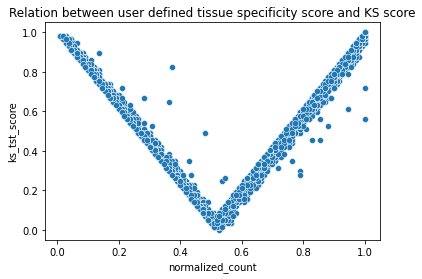

In [ ]:
# Plotting user defined score vs KS Test score
plt.title('Relation between user defined tissue specificity score and KS score')
# sns.scatterplot(data=df_bsln, x="UDF_Score", y="ks_tst_score")
sns.scatterplot(data=df_bsln, x="normalized_count", y="ks_tst_score")


Scatterplot Output -->

The normalized count and KS Test scores have a v-shaped relation.

However, when plotting against the other scores it looks very suspicious and not what we would have expected. It seems that it shows high specificity for both ends un-specific and specific genes of the other methods.

# 3.6) Tissue specificity score using Chi-square Test

Therefore, we wanted to test a very similar approach as the KS-test - this time using the chi-squre test to check uniform distributions.

In [ ]:
# Tissue specificity score using Chi-square Test

# Use Chi Square Test to identify if the distribution at each row is uniform or it has peaks
col_lst=df_bsln.columns[:-3]
# print(col_lst)

df=df_bsln[col_lst].copy()

# df=df.head(2)

def chi_sqr_tst(row):
  """ Description of the Function
    
    Calculating Chi_square Test on dataframe row vs Universal distribution

    Input --> dataframe row

    Output --> Chi Square Test score

    """
  # print(chisquare(row))
  c,p=chisquare(row)
  return c

chi_sqr_tst_pval=df.apply(chi_sqr_tst, axis=1)  

df_bsln['chi_sqr_score']=chi_sqr_tst_pval

# Replacing NaN with 0
df_bsln['chi_sqr_score']=df_bsln['chi_sqr_score'].fillna(0)


# Min Max normalization of KS Test p val
df_bsln['chi_sqr_score']=(df_bsln['chi_sqr_score']-df_bsln['chi_sqr_score'].min())/(df_bsln['chi_sqr_score'].max()-df_bsln['chi_sqr_score'].min())

df_bsln.head(5)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in subtract
  terms = (f_obs - f_exp)**2 / f_exp
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,Brodmann (1909) area 9,C1 segment of cervical spinal cord,caudate nucleus,"CD14-positive, CD16-negative classical monocyte","CD3-positive, CD4-positive, CD8-positive, double positive thymocyte","CD34-negative, CD41-positive, CD42-positive megakaryocyte cell",CD38-negative naive B cell,"CD4-positive, alpha-beta T cell","CD4-positive, alpha-beta thymocyte","CD8-positive, alpha-beta T cell","CD8-positive, alpha-beta thymocyte","central memory CD4-positive, alpha-beta T cell","central memory CD8-positive, alpha-beta T cell",cerebellar hemisphere,cerebellum,cerebral cortex,class switched memory B cell,colon,common lymphoid progenitor,common myeloid progenitor,conventional dendritic cell,coronary artery,cortex of kidney,cytotoxic CD56-dim natural killer cell,duodenum,EBV-transformed lymphocyte,ectocervix,"effector memory CD4-positive, alpha-beta T cell","effector memory CD8-positive, alpha-beta T cell",endocervix,endometrium,endothelial cell of umbilical vein (proliferating),endothelial cell of umbilical vein (resting),erythroblast,esophagogastric junction,esophagus,esophagus mucosa,esophagus muscularis mucosa,fallopian tube,frontal lobe,gall bladder,granulocyte monocyte progenitor cell,greater omentum,heart,heart left ventricle,hematopoietic multipotent progenitor cell,hematopoietic stem cell,hippocampus proper,hypothalamus,inflammatory macrophage,kidney,leukocyte,liver,lower leg skin,lung,lymph node,macrophage,mature eosinophil,mature neutrophil,megakaryocyte-erythroid progenitor cell,memory B cell,minor salivary gland,neutrophilic metamyelocyte,nucleus accumbens,ovary,pancreas,pituitary gland,placenta,plasma cell,prefrontal cortex,prostate gland,putamen,rectum,regulatory T cell,saliva-secreting gland,segmented neutrophil of bone marrow,sigmoid colon,skeletal muscle tissue,small intestine,small intestine Peyer's patch,smooth muscle tissue,spleen,stomach,subcutaneous adipose tissue,substantia nigra,suprapubic skin,temporal lobe,testis,thyroid gland,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin,count,normalized_count,max_val,min_val,avg_val,UDF_Score,gini_score,tau_score,ks_tst_score,chi_sqr_score
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7SK,0.000000,5.629357,16.944775,7.836050,6.550747,6.154818,8.895575,1.906891,8.394463,5.087463,7.727920,7.204571,7.317413,7.851749,15.274642,15.659494,15.243750,16.502509,15.105561,14.934198,17.119868,15.620005,15.860250,16.334649,7.909893,7.299208,6.731319,17.982740,0.584963,27.148219,8.957102,15.787903,5.894818,6.463524,15.960850,0.000000,5.714246,6.344296,16.464825,15.284553,6.169925,2.459432,16.826139,17.019740,14.175394,5.209453,0.000000,5.066089,5.607330,5.72792,6.330917,0.000000,6.930737,5.159871,2.459432,5.599913,11.114718,9.963257,7.707359,7.396605,17.402841,4.554589,4.285402,6.290019,5.189825,5.276124,0.000000,17.175201,11.623653,12.261581,9.512247,16.854923,4.754888,15.409524,7.939579,5.857981,5.357552,5.599913,0.000000,2.754888,3.954196,5.988685,8.129283,-1.000000,16.047667,0.000000,12.708545,5.159871,5.238405,0.000000,4.781360,1.000000,5.988685,4.700440,4.768184,7.622052,5.266787,9.939579,6.118941,6.164907,5.066089,5.442943,1.584963,4.426265,5.108524,5.523562,5.965784,6.076816,0.000000,1.000000,101,0.918182,27.148219,-1.0,7.922570,0.626355,0.446217,0.922538,0.807018,0.195691
A1BG,0.000000,3.807355,4.129283,5.087463,4.247928,5.554589,5.247928,0.000000,5.247928,4.584963,5.392317,5.426265,5.954196,5.507795,4.523562,6.066089,5.554589,5.228819,4.584963,5.523562,5.930737,6.228819,4.857981,5.781360,6.794416,6.882643,5.727920,5.672425,2.321928,3.754888,6.285402,5.285402,5.426265,4.087463,3.459432,0.000000,6.108524,5.321928,5.129283,5.285402,5.700440,4.247928,3.

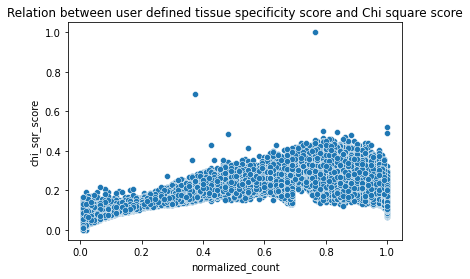

In [ ]:
# Plotting user defined score vs KS Test score
plt.title('Relation between user defined tissue specificity score and Chi square score')
sns.scatterplot(data=df_bsln, x="normalized_count", y="chi_sqr_score")

The relation of the scores looks a bit closer as what we have expected - but it seems that the scaling using the max min values were to conservative - because the chi square's max value is extremely high and therefore dampens all the other scores to very low numbers - Maybe we should have used another approach to scale the scores.

# 3.7) Comparison of the 6 Tissue Specificity scores and gene distribution 

Plot the distribution of the highest and lowest self-defined distributed genes along with a horizontal bar chart of their 6 tissue specificity scores.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


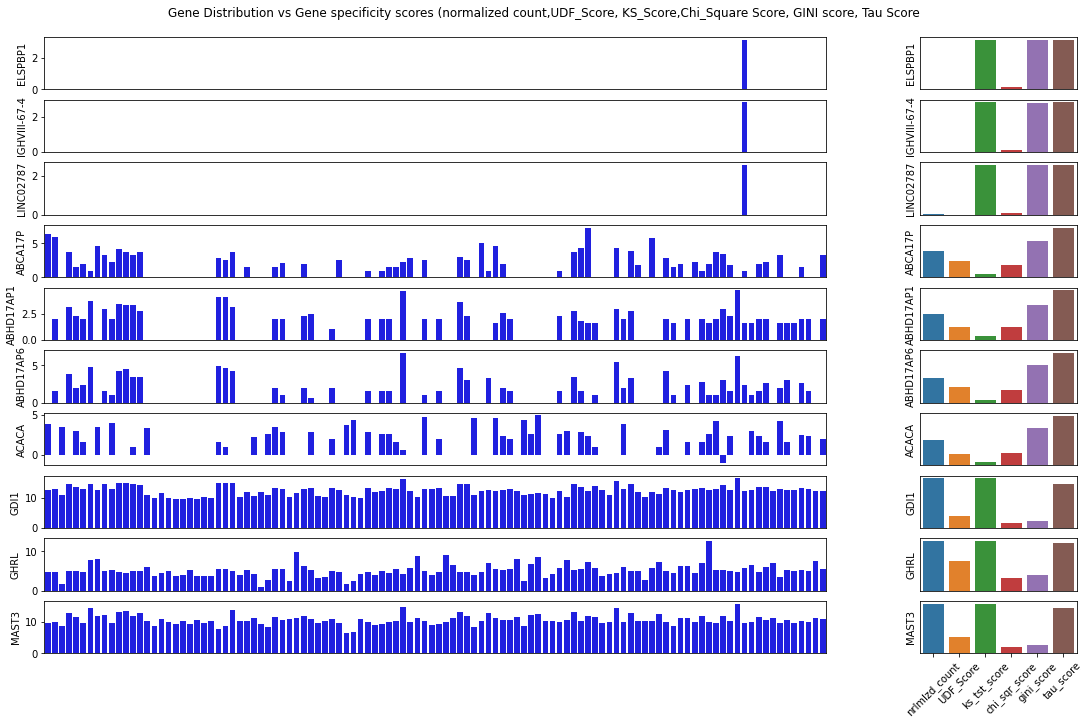

In [ ]:
# Visualization function for Gene Expression distribution and Tissue Specificity Scores
def Tissue_specific_Viz (frame):
  """ Description of the Function
    
    Visualizing the Gene Expression distribution and Tissue Specificty Scores

    Input --> dataframe 

    Output --> Sub plots containing the Gene Expression distribution and Tissue Specificty Scores

    """

  df_bsln=frame

  # Sorting the data by normalized count and taking the Top 5 and Bottom 5 rows
  # df_sorted_top5=df_bsln.sort_values('normalized_count',ascending=False).head(5)
  # df_sorted_btm5=df_bsln.sort_values('normalized_count',ascending=True).head(5)

  df_sorted_top3=df_bsln.sort_values('normalized_count').head(3)
  df_sorted_btm3=df_bsln.sort_values('normalized_count').tail(3)

  df_sorted_mid4= df_bsln[(df_bsln["normalized_count"] > 0.48) & (df_bsln["normalized_count"] < 0.52 )].head(4)


  # Concantenate the 2 dataframes
  df_vertical_stack = pd.concat([df_sorted_top3,df_sorted_mid4, df_sorted_btm3], axis=0)
  # df_vertical_stack = pd.concat([df_sorted_top5,df_sorted_btm5], axis=0)

  #print(df_vertical_stack)

  # Plot the 20 Gene Distribution and their 3 Tissue Specificity scores 
  # fig,(ax1,ax2,ax3,
  #     ax4,ax5,ax6,
  #     ax7,ax8,ax9,
  #     ax10,ax11,ax12,
  #     ax13,ax14,ax15,
  #     ax16,ax17,ax18,
  #     ax19,ax20,
  #     )=plt.subplots(20,1,figsize=(10,10))



  fig = plt.figure()
  spec = gridspec.GridSpec(ncols=2, nrows=10,
                          width_ratios=[5, 1])

  # Setting up the 20 axes
  ax0 = fig.add_subplot(spec[0])
  ax1 = fig.add_subplot(spec[1])
  ax2 = fig.add_subplot(spec[2])
  ax3 = fig.add_subplot(spec[3])
  ax4 = fig.add_subplot(spec[4])
  ax5 = fig.add_subplot(spec[5])
  ax6 = fig.add_subplot(spec[6])
  ax7 = fig.add_subplot(spec[7])
  ax8 = fig.add_subplot(spec[8])
  ax9 = fig.add_subplot(spec[9])
  ax10 = fig.add_subplot(spec[10])
  ax11 = fig.add_subplot(spec[11])
  ax12 = fig.add_subplot(spec[12])
  ax13 = fig.add_subplot(spec[13])
  ax14 = fig.add_subplot(spec[14])
  ax15 = fig.add_subplot(spec[15])
  ax16 = fig.add_subplot(spec[16])
  ax17 = fig.add_subplot(spec[17])
  ax18 = fig.add_subplot(spec[18])
  ax19 = fig.add_subplot(spec[19])


  dist_count=[ax0,ax2,ax4,ax6,ax8,ax10,ax12,ax14,ax16,ax18,]
  score_count=[ax1,ax3,ax5,ax7,ax9,ax11,ax13,ax15,ax17,ax19]

  # Retrieving the col list
  col_lst=df_vertical_stack.columns[:110]
  # print(col_lst)

  df1=df_vertical_stack[col_lst]
  df2=df_vertical_stack[['normalized_count','UDF_Score','ks_tst_score','chi_sqr_score','gini_score','tau_score']]

  fig.suptitle('Gene Distribution vs Gene specificity scores (normalized count,UDF_Score, KS_Score,Chi_Square Score, GINI score, Tau Score')
  for i in range(df1.shape[0]):
    # print(i)
    data=df1.iloc[i]
    df=pd.DataFrame(data)
    
    g=sns.barplot(data = df
              ,x = df.index
              ,y = df.iloc[:, 0]
              ,color = 'blue' 
              ,ci = None
              # ,order=col_lst
              ,ax=dist_count[i])


    dist_count[i-1].set_xticks([]) # removing axis ticks

    data2=df2.iloc[i]
    score_df=pd.DataFrame(data2)

    h=sns.barplot(data = score_df
              ,x = score_df.index
              ,y = score_df.iloc[:, 0]
              # ,color='grey'
              ,ci = None
              # ,order=col_lst
              ,ax=score_count[i])


  # Switching off ticks labels
    dist_count[i].set_xticks([])
    # dist_count[i].set_yticks([])
    # dist_count[i].grid('off')
    score_count[i].set_xticks([])
    score_count[i].set_yticks([])
    score_count[i].grid('off')

    
  # Setting up labels in the last subplot
  plt.sca(ax19)
  plt.xticks([0, 1, 2,3,4,5], ['nrlmlzd_count','UDF_Score','ks_tst_score','chi_sqr_score','gini_score','tau_score'],
            color="black",rotation=45)
  plt.grid(False)

  # #Show Plot
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=50.0)
  fig.subplots_adjust(top=0.94)

  # fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 10.5)

  plt.show()


# Executing the function
Tissue_specific_Viz (df_bsln)


Tissue Specificity Score Comparison Result -->

Due to time issues, we were not able to compare all of these methods. However, we have decided to compare the 6 methods based on some manual visualization and align our expectations how these scores should behave for certain distribution plots above.

Among the 6 tissue specificity scores evaluated -only the gini_score and the normalized count score seem to be able to capture the uniformity, intermediate specific to highly specific genes in its scores.

However, because of our mentioned concerns about the performance of the normalized count method in cases where we have some but not zero expression for the organs but highly specific expression for a few organs we have decided to go along with the gini coefficient.

Hence, we will proceed with gini_score.
However we need to reverse the direction so that a score of 1 would indicate an unspecific gene (high risk) and 0 would indicate a specific gene (low risk). Any resultant outliers (greater than 1 or less than 0) need to be replaced with either 0 at lower end and 1 at higher end.

We have also identified 42 cases of missing values for gini_score that need to be dropped.



In [ ]:
# Modified gini_score named as 'gini_score2'
df_bsln['gini_score2']=1-df_bsln['gini_score']

# Ternary operation to replace gini score values greater than 1 with 1 and less than 0 with 0
df_bsln['gini_score2'] = np.where(df_bsln['gini_score2'] > 1, 1.0, df_bsln['gini_score2'])
df_bsln['gini_score2'] = np.where(df_bsln['gini_score2'] < 0, 0.0, df_bsln['gini_score2'])

# Dropping the missing values due to gini score
print('Before dropna',df_bsln.shape)
df_bsln.dropna(inplace=True)
print('After dropna',df_bsln.shape)

# Checking dataframe to see impact of changes
df=df_bsln[['adipose tissue','gini_score2']]
df=df.drop(['adipose tissue'], axis = 1)

print('Statistical Description of Gini Score')
print(df.describe())

print('Count of missing values of Gini Score')
print(df.isnull().sum(axis=0))

Before dropna (30537, 121)
After dropna (30517, 121)
Statistical Description of Gini Score
        gini_score2
count  30517.000000
mean       0.497867
std        0.328028
min        0.000000
25%        0.147729
50%        0.573697
75%        0.829099
max        0.915395
Count of missing values of Gini Score
gini_score2    0
dtype: int64


# 3.8) Comparison on updated Tissue specificity scores and gene distribution

Plot the distribution of the highest and lowest self-defined distributed genes along with a horizontal bar chart of their 6 tissue specificity scores -now including modified gini score.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


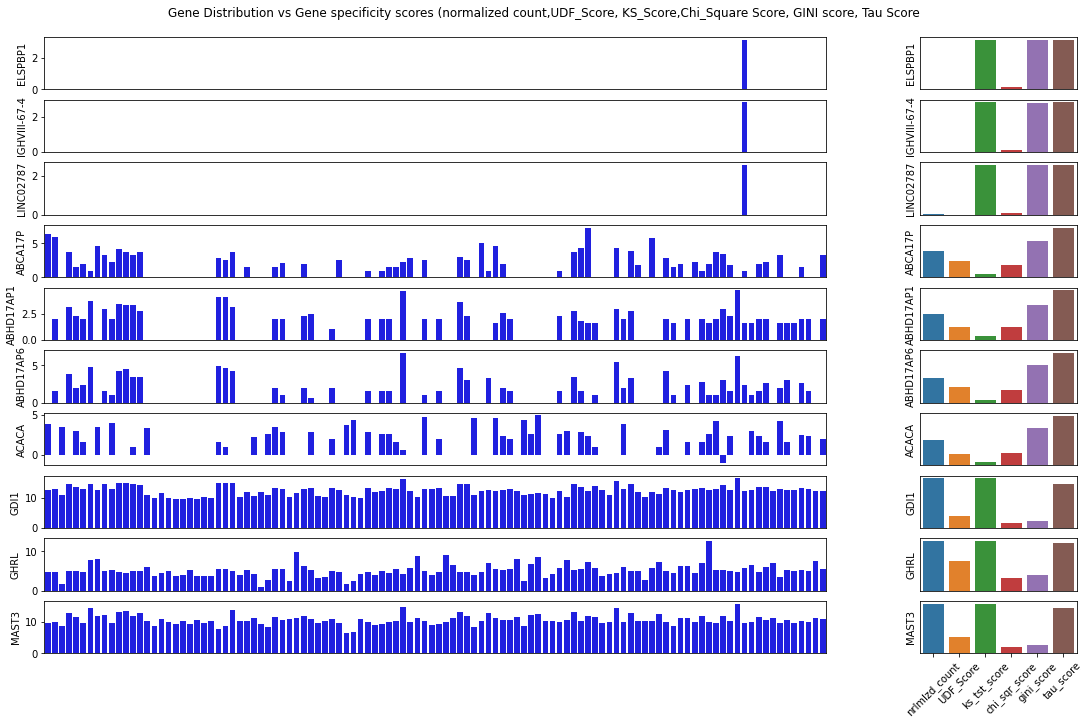

In [ ]:
# Visualization function for Gene Expression distribution and Tissue Specificity Scores
def Tissue_specific_Viz (frame):
  """ Description of the Function
    
    Visualizing the Gene Expression distribution and Tissue Specificty Scores

    Input --> dataframe 

    Output --> Sub plots containing the Gene Expression distribution and Tissue Specificty Scores

    """

  df_bsln=frame

  # Sorting the data by normalized count and taking the Top 5 and Bottom 5 rows
  # df_sorted_top5=df_bsln.sort_values('normalized_count',ascending=False).head(5)
  # df_sorted_btm5=df_bsln.sort_values('normalized_count',ascending=True).head(5)

  df_sorted_top3=df_bsln.sort_values('normalized_count').head(3)
  df_sorted_btm3=df_bsln.sort_values('normalized_count').tail(3)

  df_sorted_mid4= df_bsln[(df_bsln["normalized_count"] > 0.48) & (df_bsln["normalized_count"] < 0.52 )].head(4)


  # Concantenate the 2 dataframes
  df_vertical_stack = pd.concat([df_sorted_top3,df_sorted_mid4, df_sorted_btm3], axis=0)
  # df_vertical_stack = pd.concat([df_sorted_top5,df_sorted_btm5], axis=0)

  #print(df_vertical_stack)

  # Plot the 20 Gene Distribution and their 3 Tissue Specificity scores 
  # fig,(ax1,ax2,ax3,
  #     ax4,ax5,ax6,
  #     ax7,ax8,ax9,
  #     ax10,ax11,ax12,
  #     ax13,ax14,ax15,
  #     ax16,ax17,ax18,
  #     ax19,ax20,
  #     )=plt.subplots(20,1,figsize=(10,10))



  fig = plt.figure()
  spec = gridspec.GridSpec(ncols=2, nrows=10,
                          width_ratios=[5, 1])

  # Setting up the 20 axes
  ax0 = fig.add_subplot(spec[0])
  ax1 = fig.add_subplot(spec[1])
  ax2 = fig.add_subplot(spec[2])
  ax3 = fig.add_subplot(spec[3])
  ax4 = fig.add_subplot(spec[4])
  ax5 = fig.add_subplot(spec[5])
  ax6 = fig.add_subplot(spec[6])
  ax7 = fig.add_subplot(spec[7])
  ax8 = fig.add_subplot(spec[8])
  ax9 = fig.add_subplot(spec[9])
  ax10 = fig.add_subplot(spec[10])
  ax11 = fig.add_subplot(spec[11])
  ax12 = fig.add_subplot(spec[12])
  ax13 = fig.add_subplot(spec[13])
  ax14 = fig.add_subplot(spec[14])
  ax15 = fig.add_subplot(spec[15])
  ax16 = fig.add_subplot(spec[16])
  ax17 = fig.add_subplot(spec[17])
  ax18 = fig.add_subplot(spec[18])
  ax19 = fig.add_subplot(spec[19])


  dist_count=[ax0,ax2,ax4,ax6,ax8,ax10,ax12,ax14,ax16,ax18,]
  score_count=[ax1,ax3,ax5,ax7,ax9,ax11,ax13,ax15,ax17,ax19]

  # Retrieving the col list
  col_lst=df_vertical_stack.columns[:110]
  # print(col_lst)

  df1=df_vertical_stack[col_lst]
  df2=df_vertical_stack[['normalized_count','UDF_Score','ks_tst_score','chi_sqr_score','gini_score','tau_score']]

  fig.suptitle('Gene Distribution vs Gene specificity scores (normalized count,UDF_Score, KS_Score,Chi_Square Score, GINI score, Tau Score')
  for i in range(df1.shape[0]):
    # print(i)
    data=df1.iloc[i]
    df=pd.DataFrame(data)
    
    g=sns.barplot(data = df
              ,x = df.index
              ,y = df.iloc[:, 0]
              ,color = 'blue' 
              ,ci = None
              # ,order=col_lst
              ,ax=dist_count[i])


    dist_count[i-1].set_xticks([]) # removing axis ticks

    data2=df2.iloc[i]
    score_df=pd.DataFrame(data2)

    h=sns.barplot(data = score_df
              ,x = score_df.index
              ,y = score_df.iloc[:, 0]
              # ,color='grey'
              ,ci = None
              # ,order=col_lst
              ,ax=score_count[i])


  # Switching off ticks labels
    dist_count[i].set_xticks([])
    # dist_count[i].set_yticks([])
    # dist_count[i].grid('off')
    score_count[i].set_xticks([])
    score_count[i].set_yticks([])
    score_count[i].grid('off')

    
  # Setting up labels in the last subplot
  plt.sca(ax19)
  plt.xticks([0, 1, 2,3,4,5], ['nrlmlzd_count','UDF_Score','ks_tst_score','chi_sqr_score','gini_score','tau_score'],
            color="black",rotation=45)
  plt.grid(False)

  # #Show Plot
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=50.0)
  fig.subplots_adjust(top=0.94)

  # fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 10.5)

  plt.show()


# Executing the function
Tissue_specific_Viz (df_bsln)


# 4.1) PCA Analysis of the 'baseline' data

[0.86114609 0.04986414]


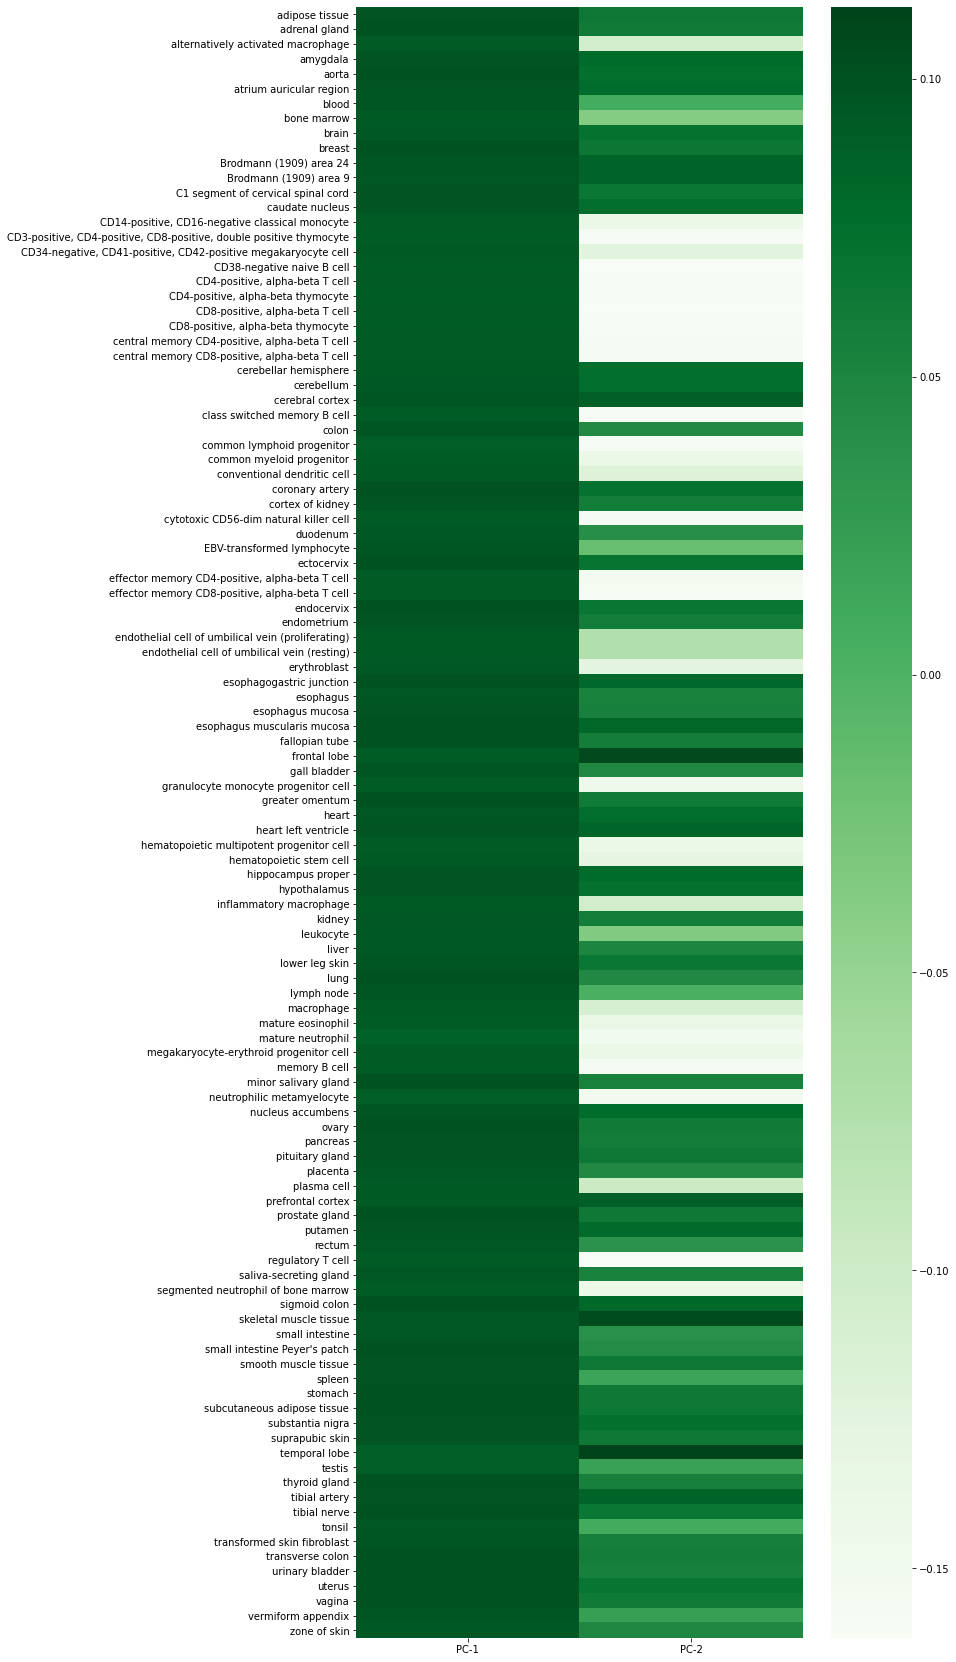

In [ ]:
# PCA on columns 


col_lst=df_bsln.columns[:110]
df_bsln1=df_bsln[col_lst]

# All default options
df_PCA=df_bsln1.copy()


# Scaling the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_PCA)
scaled_data = scaler.transform(df_PCA)

# Running PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Only 2 PCA dimensions
pca.fit(scaled_data)

print(pca.explained_variance_ratio_)

df_plot=pd.DataFrame(data = pca.components_, 
                  index = ['PC-1','PC-2',], 
                  columns = df_PCA.columns)

df_plot_t=df_plot.T
# print (df_plot_t)
pca_df = pca.transform(scaled_data)

# print(pca_df)

# Add PCA dims back to dataframe
df_bsln['PCA_dim1']=pca_df[:,0]
df_bsln['PCA_dim2']=pca_df[:,1]


# Visualize Heatmaps to show how the clusters are loaded across the features
plt.figure(figsize=(10,30))
sns.heatmap(df_plot_t,cmap='Greens')




Output from the PCA Analysis -->

The findings from the initial PCA run ('explained_variance_ratio_') is that with 2 components  91% of the variance is explained -mostly by the 1st component (86%% of Total).

While the prominent PC1 is not differentiated, PC2 with ~5% of variance is mostly concentrated in organs rather than specific cells.

Let's explore a scatterplot of the PCA components -across organs.



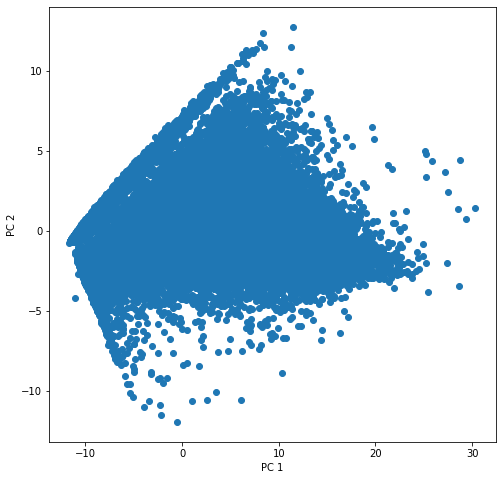

In [ ]:
# Scatterplot of 2 PCA components - Attempt 1

# Create the scatter plot
plt.figure(figsize=(8,8))
plt.scatter(pca_df[:,0], pca_df[:,1],)

# Add the axis labels
plt.xlabel('PC 1')
plt.ylabel('PC 2') 

# Done
plt.show()

# Executing the function


Output from 1st PCA scatter plot

The clutter evident in the scatter plot is due to using genes as each point.
We need to be able to use organs as the points to reduce clutter in the scatter plot.

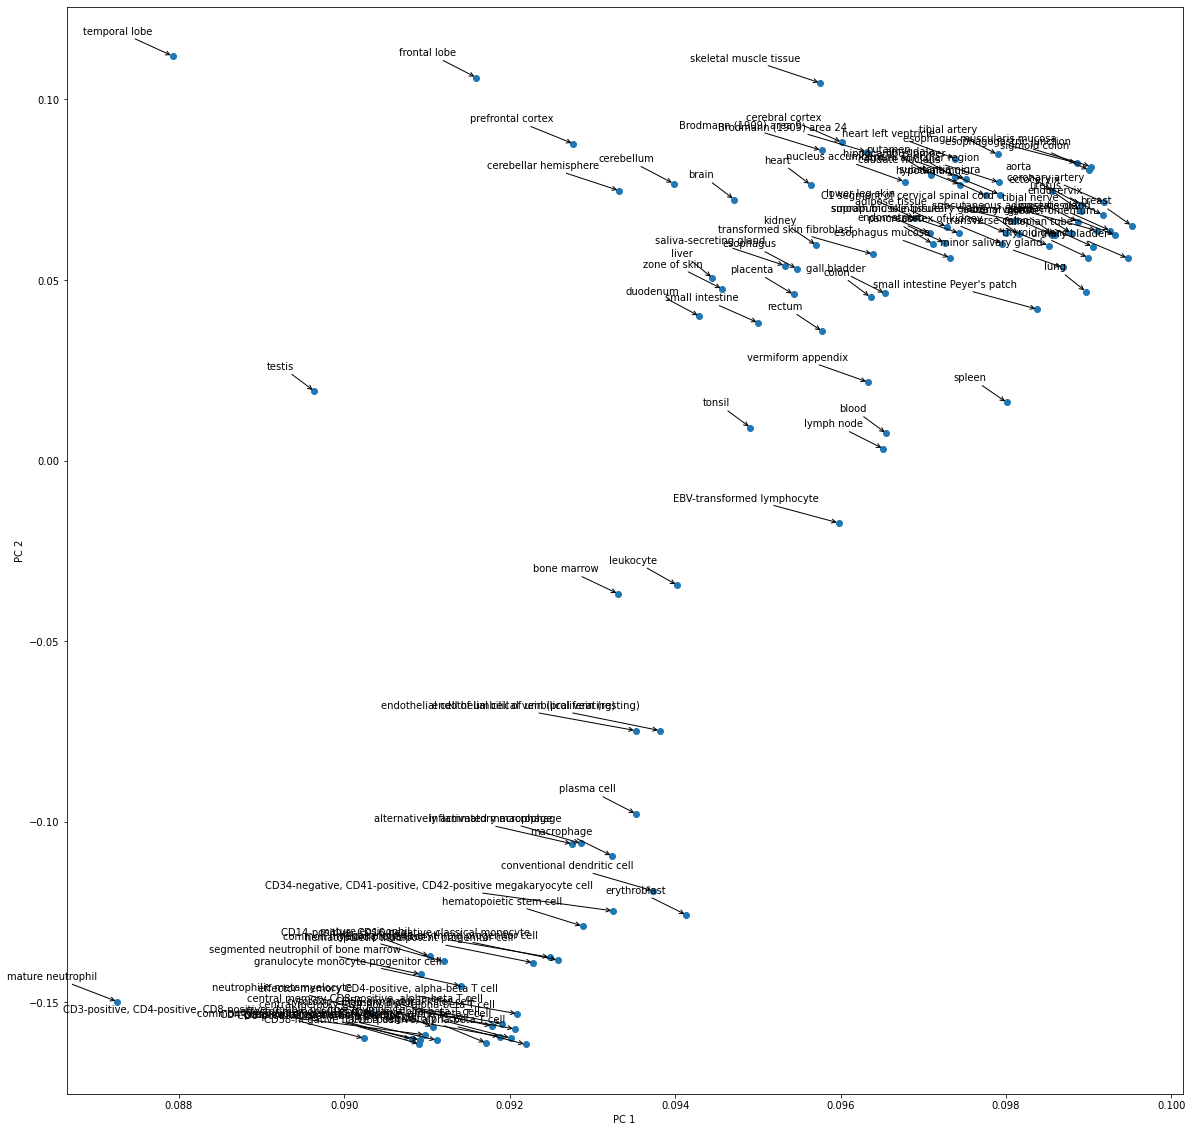

In [ ]:
# Scatterplot of 2 PCA components - Attempt 2

# Create the scatter plot
plt.figure(figsize=(20,20))
plt.scatter(df_plot_t['PC-1'], df_plot_t['PC-2'],)

# Add the axis labels
plt.xlabel('PC 1')
plt.ylabel('PC 2') 


for label, x, y in zip(df_plot_t.index, df_plot_t['PC-1'], df_plot_t['PC-2']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        fontSize=10,
        # bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


# Done
plt.show()





The PCA nicely clusters all the immune non-solid tissues together (heamaloical) and becomes a solid tissue the more one looks along the y axis - were we see another obvious separation between the central nervous system and all other solid organs. 

# 5.1) Saving the Final baseline dataframe

In [ ]:
# Setting up the tissue_specificity_score column
df_bsln['tissue_specificity_score']=df_bsln['gini_score2']


# Setting up the final_bsln dataframe
final_bsln=df_bsln[['adipose tissue','tissue_specificity_score']]


final_bsln=df_bsln[['adipose tissue','tissue_specificity_score']]

final_bsln=final_bsln.drop(['adipose tissue'], axis = 1)

print('#'*60)
print('Final baseline dataframe')
print(final_bsln.head())
print('Before gini tissue specificity score manipulation')
print('\n Final baseline dataframe description')
print(final_bsln.describe())
print('\n FInal baseline data frame missing value')
print(final_bsln.isnull().sum(axis=0))
print('#'*60)



# # Exporting the onco_df dataframe as csv
path='/content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/Baseline.csv'
final_bsln.to_csv(path)

############################################################
Final baseline dataframe
          tissue_specificity_score
SYMBOL                            
7SK                       0.553783
A1BG                      0.685998
A1BG-AS1                  0.048413
A1CF                      0.242063
A2M                       0.731847
Before gini tissue specificity score manipulation

 Final baseline dataframe description
       tissue_specificity_score
count              30517.000000
mean                   0.497867
std                    0.328028
min                    0.000000
25%                    0.147729
50%                    0.573697
75%                    0.829099
max                    0.915395

 FInal baseline data frame missing value
tissue_specificity_score    0
dtype: int64
############################################################
